# Визуализация с помощью библиотеки Seaborn

[Документация](https://seaborn.pydata.org/tutorial.html)

Seaborn предоставляет API поверх библиотеки Matplotlib, обеспечивающий разумные варианты стилей графиков и цветов по умолчанию, определяющий простые высокоуровневые функции для часто встречающихся типов графиков и хорошо интегрирующийся с функциональностью, предоставляемой объектами DataFrame библиотеки Pandas.

### Seaborn по сравнению с Matplotlib

Вот пример простого графика случайных блужданий с использованием стиля
classic для форматирования и цветов графика. Начнем с обычных импортов:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Создаем данные случайных блужданий:

In [2]:
# Создаем данные
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

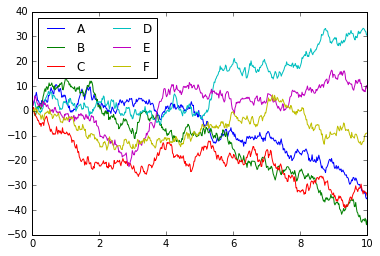

In [3]:
# Рисуем график, используя параметры Matplotlib по умолчанию
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Хотя результат содержит всю информацию, которую нам требуется донести до
читателя, это происходит не слишком приятным глазу образом, и даже выглядит
слегка старомодным в свете современных визуализаций данных.

Теперь посмотрим, как можно сделать это с помощью Seaborn. Помимо множества
собственных высокоуровневых функций построения графиков библиотеки Seaborn,
она может также перекрывать параметры по умолчанию библиотеки Matplotlib,
благодаря чему применение даже более простых сценариев Matplotlib приводит к намного лучшему результату. Задать стиль можно с помощью метода set() библиотеки
Seaborn. По принятым соглашениям Seaborn импортируется под именем sns :

In [4]:
import seaborn as sns
sns.set()

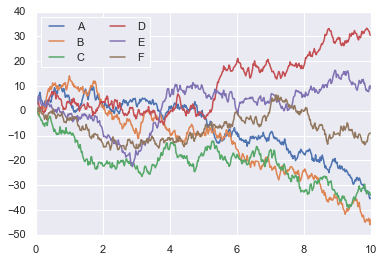

In [5]:
# Тот же самый код для построения графика, что и выше!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Анализируем графики библиотеки Seaborn

Основная идея библиотеки Seaborn — предоставление высокоуровневых команд для создания множества различных типов графиков, удобных для исследования статистических данных и даже подгонки статистических моделей.

Рассмотрим некоторые из имеющихся в Seaborn наборов данных и типов графиков. Обратите внимание, что все изложенное далее можно выполнить и с помощью обычных команд библиотеки Matplotlib, но API Seaborn намного более удобен.

### Гистограммы, KDE и плотности

Зачастую все, что нужно сделать при визуализации статистических данных, — это построить гистограмму и график совместного распределения переменных. 

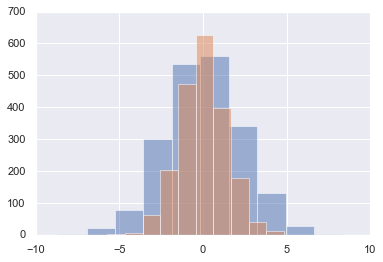

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Вместо гистограммы можно получить гладкую оценку распределения путем ядерной оценки плотности распределения, которую Seaborn выполняет с помощью функции sns.kdeplot

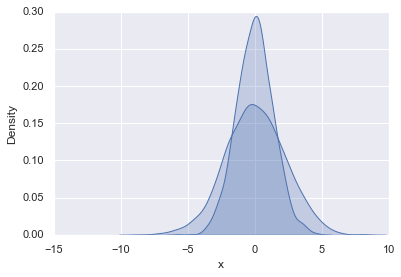

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

С помощью функции distplot можно сочетать гистограммы и KDE

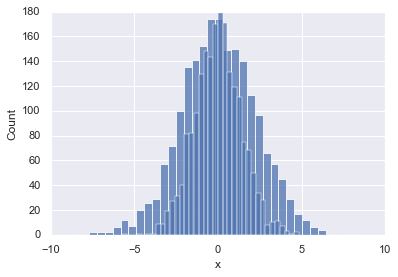

In [10]:
sns.histplot(data['x'])
sns.histplot(data['y']);

При обобщении графиков совместных распределений на наборы данных более
высоких размерностей мы постепенно приходим к графикам пар (pair plots). Они
очень удобны для изучения зависимостей между многомерными данными, когда
необходимо построить график всех пар значений.

Мы продемонстрируем это на наборе данных Iris, содержащем измерения лепестков и чашелистиков трех видов ирисов:

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Визуализация многомерных зависимостей между выборками сводится к вызову
функции sns.pairplot

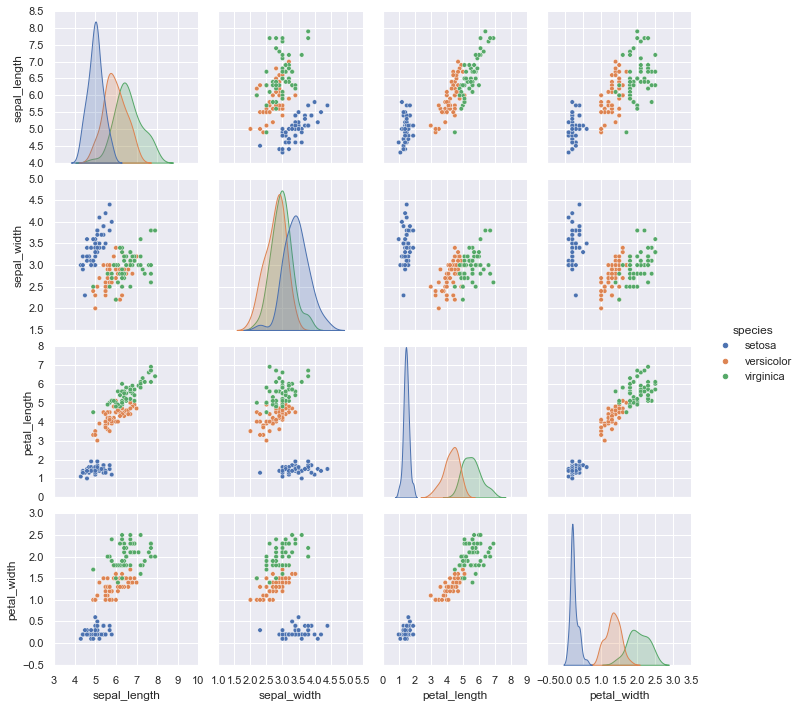

In [14]:
sns.pairplot(iris, hue='species', height=2.5);

### Фасетные гистограммы

Иногда оптимальный способ представления данных — гистограммы подмножеств.
Функция FacetGrid библиотеки Seaborn делает эту задачу элементарной. Рассмотрим данные, отображающие суммы, которые персонал ресторана получает в качестве чаевых, в зависимости от данных различных индикаторов

In [15]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

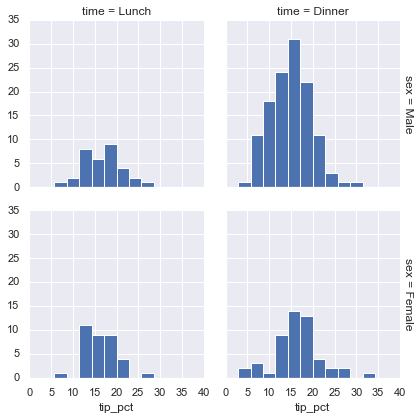

In [17]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));